In [ ]:
!pip install fbprophet

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 7.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=f6a11b594a42c31af0c2743b146c2d3cd3fd3a02350bd645153e68271925c573
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
from fbprophet import Prophet

In [ ]:
df = yf.download("BTC-USD",start="2007-01-01",interval = "1d") #default 1 day.

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.to_csv("/content/sample_data/btc.csv")

In [ ]:
df = df.reset_index()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2455,2021-06-11,36697.031250,37608.695312,36044.449219,37334.398438,37334.398438,38699736985
2456,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625,35552.515625,37924228550
2457,2021-06-13,35555.789062,39322.781250,34864.109375,39097.859375,39097.859375,40669112838
2458,2021-06-14,39016.968750,40978.363281,38757.285156,40536.070312,40536.070312,48513128441


In [ ]:
#Add 2 columns ds date and close for the prediction, its required by FacebookProphet model.
df[["ds","y"]] = df[["Date","Adj Close"]]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014-09-17,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014-09-18,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014-09-19,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014-09-20,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014-09-21,398.821014
...,...,...,...,...,...,...,...,...,...
2455,2021-06-11,36697.031250,37608.695312,36044.449219,37334.398438,37334.398438,38699736985,2021-06-11,37334.398438
2456,2021-06-12,37340.144531,37408.925781,34728.191406,35552.515625,35552.515625,37924228550,2021-06-12,35552.515625
2457,2021-06-13,35555.789062,39322.781250,34864.109375,39097.859375,39097.859375,40669112838,2021-06-13,39097.859375
2458,2021-06-14,39016.968750,40978.363281,38757.285156,40536.070312,40536.070312,48513128441,2021-06-14,40536.070312


In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Here we are going to select the time in future that we want to predict.
future = model.make_future_dataframe(30) #Nº of days

In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,366.270616,-7195.979114,3588.176002,366.270616,366.270616,-1983.003287,-1983.003287,-1983.003287,-17.745045,-17.745045,-17.745045,-1965.258242,-1965.258242,-1965.258242,0.0,0.0,0.0,-1616.732671
1,2014-09-18,365.244594,-6829.892491,3849.982639,365.244594,365.244594,-1986.404531,-1986.404531,-1986.404531,-18.430236,-18.430236,-18.430236,-1967.974295,-1967.974295,-1967.974295,0.0,0.0,0.0,-1621.159937
2,2014-09-19,364.218572,-6976.484084,3832.603079,364.218572,364.218572,-1931.387480,-1931.387480,-1931.387480,38.768478,38.768478,38.768478,-1970.155958,-1970.155958,-1970.155958,0.0,0.0,0.0,-1567.168908
3,2014-09-20,363.192549,-6904.483384,3717.803227,363.192549,363.192549,-1969.938728,-1969.938728,-1969.938728,1.981627,1.981627,1.981627,-1971.920355,-1971.920355,-1971.920355,0.0,0.0,0.0,-1606.746179
4,2014-09-21,362.166527,-6852.344159,3663.456137,362.166527,362.166527,-2015.368738,-2015.368738,-2015.368738,-42.009133,-42.009133,-42.009133,-1973.359605,-1973.359605,-1973.359605,0.0,0.0,0.0,-1653.202211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,2021-07-12,49902.804805,43387.398332,54101.086334,49883.395649,49925.107442,-1006.548107,-1006.548107,-1006.548107,17.402325,17.402325,17.402325,-1023.950433,-1023.950433,-1023.950433,0.0,0.0,0.0,48896.256698
2486,2021-07-13,49996.856602,43771.520334,54351.858674,49970.770336,50027.949935,-1032.610286,-1032.610286,-1032.610286,20.031984,20.031984,20.031984,-1052.642270,-1052.642270,-1052.642270,0.0,0.0,0.0,48964.246316
2487,2021-07-14,50090.908399,43515.486635,54450.462406,50060.729489,50131.289512,-1095.990939,-1095.990939,-1095.990939,-17.745045,-17.745045,-17.745045,-1078.245894,-1078.245894,-1078.245894,0.0,0.0,0.0,48994.917459
2488,2021-07-15,50184.960196,43147.932637,54141.540653,50145.408707,50229.134025,-1118.961868,-1118.961868,-1118.961868,-18.430236,-18.430236,-18.430236,-1100.531631,-1100.531631,-1100.531631,0.0,0.0,0.0,49065.998328


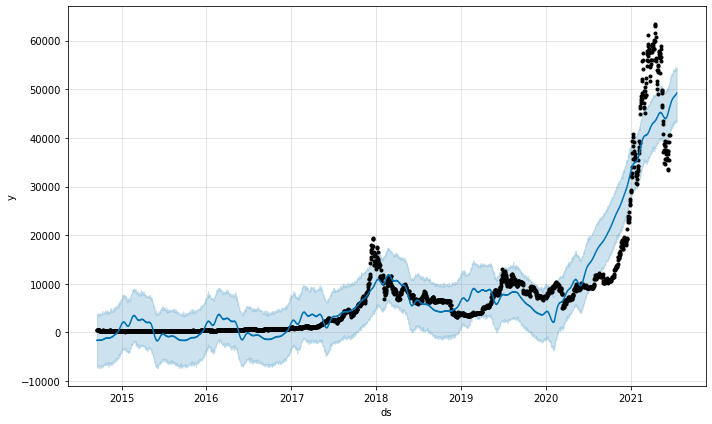

In [ ]:
model.plot(forecast)
plt.show()

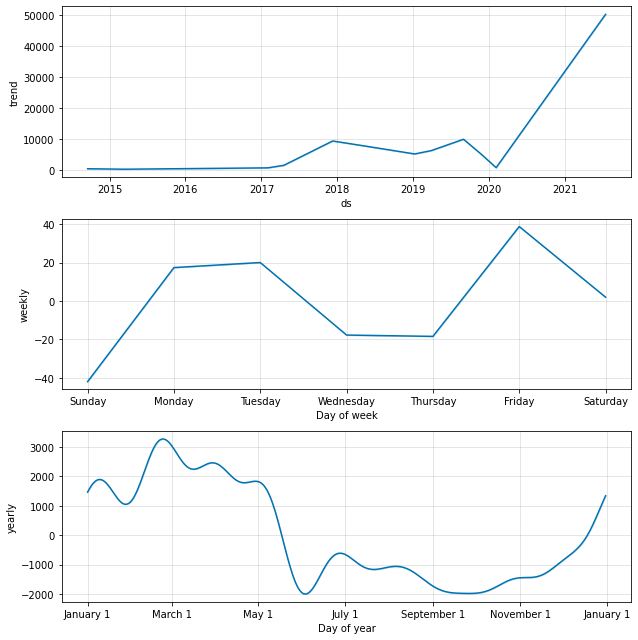

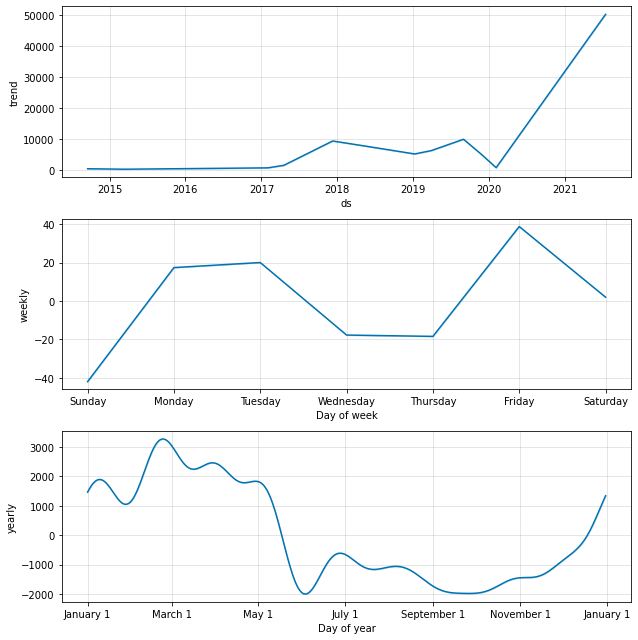

In [ ]:
#Aditional information about trend
model.plot_components(forecast)